<h1>MAC Waves Finite Volume/Fourier Hybrid Model - with Full Viscosity</h1>
<p>By Nicholas Knezek<br>
March 2015</p>

<h2> Governing Equations:</h2>
$$
\frac{d\vec{u}}{dt} = 
- (\vec{u}\cdot\nabla)\vec{u}
- \nabla P 
+ \nabla\cdot T_m
+ E \nabla ^2 \vec{u}
- 2(cos\theta \hat{r}) \times \vec{u} 
+ \omega_g^2 \delta r
$$

$$
\frac{d\vec{B}}{dt} = 
\nabla \times (\vec{u} \times \vec{B})
+ \frac{E}{Pr_{m}} \nabla ^2 \vec{B}
$$

$$ \nabla \cdot \vec{u} = 0 $$ 
$$ \nabla \cdot \vec{B} = 0 $$ 

<h3>Boundary Conditions:</h3>
<h4>Free-Slip Velocity Boundary Conditions</h4>
$$ \begin{array}{ccc}
u_r = 0 & \frac{\partial}{\partial r}(r^2 u_\theta) = 0  &  \frac{\partial}{\partial r}(r^2 u_\phi) = 0  
\end{array}$$
<h4>Psuedo-Vacuum Magnetic Boundary Conditions</h4>
$$ \begin{array}{ccc}
\frac{\partial}{\partial r}(r^2 b_r) = 0 &  b_\theta = 0  &  b_\phi = 0
\end{array}$$
<h4>Pressure Continuity (no background radial acceleration</h4>
$$ \frac{\partial P}{\partial r} = 0 $$


<h2>Model Formulation</h2>
<p>Spherical Coordinate System $(r,\theta,\phi)$<br>
$N_k$ points in $r$-direction <br>
$N_l$ points in $\theta$-direction<br>
Fourier Decomposition in $\phi$-direction <br>
Values at Center of Cells
</p>

<h3> Wave Assumption </h3>
$$ P, \vec{u}, \vec{b} = Ce^{(im\phi + \lambda t)} $$

<h3> Linearized Fields</h3>
$$ \vec{u} = u_r\hat{r} + u_{\theta}\hat{\theta} + (U_0 + u_{\phi})\hat{\phi} $$
$$ \vec{B} = (B_0 + b_r)\hat{r} + b_{\theta}\hat{\theta} + b_{\phi}\hat{\phi} $$

<h3> Operators </h3>
$$\begin{array}{cc}
D_r \Psi =  &  
\left(\frac{r_+^2/r^2}{2\Delta r}\right)\Psi^{k+1} + \left(\frac{-r_{-}^2/r^2}{2\Delta r}\right)\Psi^{k-1} + \left(\frac{-sin\theta_+}{4r\sin\theta}\right)\Psi^{l+1} + \left(\frac{-sin\theta_-}{4r\sin\theta}\right)\Psi^{l-1} + \left(\frac{-sin\theta_+-sin\theta_-}{4r\sin\theta}\right)\Psi  \\
D_\theta \Psi = & 
\left(\frac{sin\theta_+/\sin\theta}{ 2r\Delta\theta}\right)\Psi^{l+1} + \left(\frac{-sin\theta_-/\sin\theta}{ 2r\Delta\theta}\right)\Psi^{l-1} + \left(\frac{(sin\theta_+ - \sin\theta_-)/\sin\theta}{2r\Delta\theta}- \frac{cos\theta}{rsin\theta}\right)\Psi  \\
D_\phi \Psi= & 
\left(\frac{im}{rsin\theta} \right) \Psi \\
d_rA = &
\left(\frac{r_+^2/r^2}{2\Delta r}\right)A^{k+1} + \left(\frac{-r_{-}^2/r^2}{2\Delta r}\right)A^{k-1} + \left(\frac{1}{r}\right)A  \\
d_\theta A = &
\left(\frac{sin\theta_+/\sin\theta}{ 2r\Delta\theta}\right)A^{l+1} + \left(\frac{-sin\theta_-/\sin\theta}{ 2r\Delta\theta}\right)A^{l-1} + \left(\frac{(sin\theta_+ - \sin\theta_-)/\sin\theta}{2r\Delta\theta} \right) A  \\
d_\phi A = &
\left(\frac{im}{rsin\theta} \right) A \\
D^2_3 A = &
\left(\frac{r_+^2/r^2}{\Delta r^2}\right)A^{k+1} + \left(\frac{r_{-}^2/r^2}{\Delta r^2}\right)A^{k-1} + \left(\frac{sin\theta_+/\sin\theta}{ r^2\Delta\theta^2}\right)A^{l+1} + \left(\frac{sin\theta_-/\sin\theta}{r^2\Delta\theta^2}\right)A^{l-1} + \left( -\frac{(r_+^2 + r_-^2)/r^2}{\Delta r^2} - \frac{(sin\theta_+ + sin\theta_-)/sin\theta}{r^2\Delta\theta^2} - \frac{m^2}{r^2 sin^2\theta} \right) A 
\end{array}$$

<h3>Equations in Operator Form</h3>
$$\begin{array}{ccccccc}
\lambda u_r &=& &  - D_r P  &  + \left(d_r B_0 b_r + d_\theta B_0 b_\theta + d_\phi B_0 b_\phi \right)  &  +  E\left(D^2_3 u_r - \frac{1}{r}d_\theta u_\theta - \frac{1}{r}d_\phi u_\phi \right)  &  - \omega_g^2 \delta r   \\
\lambda u_\theta &=& &  - D_\theta P  &  + \left(d_r B_0 b_\theta - d_\theta B_0 b_r \right)  &  + E\left(D^2_3 u_\theta + \frac{1}{r} d_\theta u_r - \frac{cot\theta}{r} u_\phi \right)  &  + 2cos\theta u_\phi  \\
\lambda u_\phi &=&  -d_\phi U_0 u_\phi  &  - D_\phi P  &  + \left( d_r B_0 b_\phi - d_\phi B_0 b_r \right)  &  + E\left( D^2_3 u_\phi + \frac{1}{r} d_\phi u_r + \frac{cot\theta}{r} d_\phi u_\theta \right)  &  -2cos\theta u_\theta \\
\lambda b_r &=& - d_\phi U_0 b_r & & \left( -d_\theta B_0 u_\theta - d_\phi B_0 u_\phi \right)  &  + \frac{E}{Pr_m}\left(D^2_3 b_r - \frac{1}{r} d_\theta b_\theta - \frac{1}{r} d_\phi b_\phi \right) &  \\
\lambda b_\theta &=& - d_\phi U_0 b_\theta & & d_r B_0 u_\theta  &  + \frac{E}{Pr_m}\left(D^2_3 b_\theta + \frac{1}{r} d_\theta b_r - \frac{cot\theta}{r} d_\phi b_\phi \right) &   \\
\lambda b_\phi &=& & & \left(d_r B_0 u_\phi - d_r U_0 b_r + d_\theta U_0 b_\theta \right)  &  + \frac{E}{Pr_m}\left(D^2_3 b_\phi + \frac{1}{r} d_\phi b_r + \frac{cot\theta}{r} d_\phi b_\theta \right) &   \\
0 &=& d_r u_r  &  + d_\theta u_\theta  &  + d_\phi u_\phi & & & \\
\lambda \delta r &=& u_r & & &
\end{array}$$

In [2]:
import numpy as np
import scipy as sp
import scipy.sparse as sparse
import scipy.sparse.linalg as LA
import matplotlib.pyplot as plt
import matplotlib.pylab as pyl
import matplotlib as mpl
import MAC_functions_braginsky_axisymmetric as mf
import MAC_plotting as mplt
from numpy import sin
from numpy import cos

%matplotlib inline
reload(mf)
reload(mplt)

<module 'MAC_plotting' from 'MAC_plotting.pyc'>

In [4]:
######################################################################
##########  Define Parameters   ######################################
######################################################################

######################################################################
#### Edit These: ####

# mode to simulate
m = 0

# Size of grid
Nk = 10
Nl = 200
Nm = 1

# Set up variables to use
model_variables = ('ur','uth','uph','br','bth','bph','p','r_disp')
boundary_variables = ('ur','uth','uph','br','bth','bph','p')

# Physical Constants
year = 365.25*24*3600  # 1 year in seconds
R = 3480. # Outer core radius in km
Omega = 2*np.pi/(24.*3600)*year # rotation rate in rad/year
rho = 1.e4  # density in kg/m^3
h = 80. # layer thickness in km
nu = 1e-4*year # momentum diffusivity in m^2/s 
eta = 2.*year # magnetic diffusivity in m^2/s
mu_0 = 4.*np.pi*10.**-7*year**2 # vacuum permeability in (kg*m/(A^2s^2))
g = 10.*year**2 # Gravity in m/s^2
drho_dr = -1e-1 # density gradient for boussinesq approximation in kg/m^4 (constant gradient in this model)
omega_g = 2*Omega #Buoyancy frequency in rad/year
T1 = 65 # Period of first mode in years
Bd = (0.446e-2*year)*(4*np.pi*rho)**0.5*(mu_0/(4*np.pi))**0.5

#### End Editable parameters ####
######################################################################

# Calculate Non-Dimensionalized Parameters
P_star = rho* (R*1000.)**2 * Omega**2
E = nu/(Omega * (R*1000.)**2)
B_star = R*1000. * Omega * (mu_0*rho)**0.5
u_star = R*1000. * Omega
Prm = nu/eta
G = (omega_g/Omega)**2
l1 = 1/(T1*Omega)
rmin = (R-h)/R
rmax = R/R
physical_constants = {'R':R,'Omega':Omega,'rho':rho,'h':h,'P_star':P_star,'rmin':rmin,'rmax':rmax,
                      'E':E,'nu':nu,'Prm':Prm,'eta':eta,'mu_0':mu_0,'B_star':B_star,'omega_g':omega_g,'G':G}

# Create model parameter vectors
# Nl = int(np.floor(Nk*R/h*np.pi))
SizeM = len(model_variables)*Nk*Nl+2*len(boundary_variables)*Nl
dr = (rmax-rmin)/(Nk)
r = np.linspace(rmin-dr/2.,rmax+dr/2.,num=Nk+2.) # r value at center of each cell
rm = np.linspace(rmin-dr,rmax,num=Nk+2.) # r value at plus border (top) of cell
rp = np.linspace(rmin,rmax+dr,num=Nk+2.) # r value at minus border (bottom) of cell
dth = np.pi/(Nl)
th = np.linspace(-dth/2.,np.pi+dth/2.,num=Nl+2.) # theta value at center of cell
thm = np.linspace(-dth,np.pi,num=Nl+2.) # theta value at plus border (top) of cell
thp = np.linspace(0,np.pi+dth,num=Nl+2.) # theta value at minus border (bottom) of cell
m_min = m
m_max = m
m_values = range(m_min,m_max+1)

### Set Background Fields
B0 = np.ones((Nk+2,Nl+2))*cos(th)*Bd/B_star
U0 = np.ones((Nk+2,Nl+2))*1e-16
# Bd = (np.average(B0[1,1:-1]**2/cos(th[1:-1])**2*sin(th[1:-1]))/2)**0.5
model_parameters = {'Nk':Nk,'Nl':Nl,'Nm':Nm,'SizeM':SizeM,
                    'dr':dr,'r':r,'rm':rm,'rp':rp,
                    'dth':dth,'th':th,'thm':thm,'thp':thp,
                    'm_values':m_values,
                    'B0':B0, 'U0':U0
                   }

print '\nMAC model, m={0}, Nk={1}, Nl={2}'.format(m,Nk,Nl)
print 'Omega = {0:.2e} rad/year'.format(Omega)
print 'omega_g = {0:.2e} rad/year'.format(omega_g)
print 'R = {0} km'.format(R)
print 'u_star = {0:.2e} m/year'.format(u_star)
print 'B_star = {0:.2e} T'.format(B_star)
print 'P_star = {0:.2e} MPa'.format(P_star*1e-6)
print 'B0 at equator = {0:.1e}'.format(B0[Nk/2,Nl/2])
print 'B0 at pole = {0:.1e}'.format(B0[1,1])
print ''
print 'G = {0:.2e}'.format(G)
print 'E = {0:.2e}'.format(E)
print 'E/Prm = {0:.2e}'.format(E/Prm)
print 'Bd = {0:.2e}, {1:.2e} T, {2:.2e} G'.format(Bd/B_star, Bd, Bd*1e4)
print 'dr^2/dth^2 = {0:.3e}'.format(dr**2/dth**2)
print ''
print 'E/dr^2 = {0:.1e}'.format(E/dr**2)
print 'E/dth^2 = {0:.1e}'.format(E/dth**2)
print ''
print 'Momentum Equation Terms'
print 'lambda*u = l1 = {0:.2e}'.format(l1)
print 'drP = 1/dr = {0:.2e}'.format(1/dr)
print 'drB0b = Bd/dr = {0:.2e}'.format(Bd/dr)
print 'E dr^2 u = E/dr^2 = {0:.2e}'.format(E/dr**2)  
print '2cos(th)*u = 2 = {0:.2e}'.format(2)
print 'Gdelr = G*l1 = {0:.2e}'.format(G*l1)
print ''
print 'Lorentz Equation Terms'
print 'lambda*b = l1 = {0:.2e}'.format(l1)
print 'dr uxB = Bd/dr = {0:.2e}'.format(u_star*Bd/dr)
print 'E/Prm/dr^2 = {0:.2e}'.format(E/Prm/dr**2)


MAC model, m=0, Nk=10, Nl=200
Omega = 2.29e+03 rad/year
omega_g = 4.59e+03 rad/year
R = 3480.0 km
u_star = 7.99e+09 m/year
B_star = 2.83e+16 T
P_star = 6.38e+17 MPa
B0 at equator = 1.4e-07
B0 at pole = 1.8e-05

G = 4.00e+00
E = 1.14e-13
E/Prm = 2.27e-09
Bd = 1.76e-05, 4.98e+11 T, 4.98e+15 G
dr^2/dth^2 = 2.142e-02

E/dr^2 = 2.1e-08
E/dth^2 = 4.6e-10

Momentum Equation Terms
lambda*u = l1 = 6.70e-06
drP = 1/dr = 4.35e+02
drB0b = Bd/dr = 2.17e+14
E dr^2 u = E/dr^2 = 2.15e-08
2cos(th)*u = 2 = 2.00e+00
Gdelr = G*l1 = 2.68e-05

Lorentz Equation Terms
lambda*b = l1 = 6.70e-06
dr uxB = Bd/dr = 1.73e+24
E/Prm/dr^2 = 4.30e-04


In [5]:
######################################################################
##########  Create Model   ###########################################
######################################################################
print '\nforming matrices'

model = mf.Model(model_variables,boundary_variables,physical_constants,model_parameters)

A_matrices = {}
M_matrices = {}
for m in m_values:
    A_matrices[m] = model.make_A(m)
    M_matrices[m] = model.make_M(m)

### Plot Matrices if Deisred
# mplt.plot_A(A_matrices[3],3)
# mplt.plot_M(M_matrices[3],3)


forming matrices


In [4]:
# mplt.plot_A(A_matrices[0],0)
# mplt.plot_M(M_matrices[0],0)

In [6]:
######################################################################
##########  Solve Eigenvalue Equation   ##############################
######################################################################
print '\nsolving eigenvalue equation'
eigenvectors = {}
eigenvalues = {}
starting_sigma = l1*1j
num_eigs_to_find = 11

# Eigenvalue to find
for m in m_values:
    eigenvectors_list_temp = []
    tol = 1e-4
    eigenvalues[m],eigenvectors_tmp = LA.eigs(A_matrices[m], k=num_eigs_to_find, M=M_matrices[m],
                                             sigma=starting_sigma, return_eigenvectors=True, tol=tol, which='LI')
    for ind in range(num_eigs_to_find):
        eigenvectors_list_temp.append(eigenvectors_tmp[:,ind])
    eigenvectors[m] = np.array(eigenvectors_list_temp)
        
    print ('Starting sigma requested for m='+str(m)
           +' : ' + str(starting_sigma) +', '+ str(len(eigenvalues[m]))+' eigenvalues found')
    print 'Eigenvalues Found:'
    for ind,val in enumerate(eigenvalues[m]):
        print '{0}: {1:.4e} , T={2:.1f}yr'.format(ind,val,(Omega*abs(val.imag))**-1/(24.*3600.*365.25))


solving eigenvalue equation
Starting sigma requested for m=0 : 6.70373055723e-06j, 11 eigenvalues found
Eigenvalues Found:
0: -8.0025e-05+4.6862e-05j , T=9.3yr
1: -7.9756e-05-7.5332e-05j , T=5.8yr
2: -7.9756e-05+7.5332e-05j , T=5.8yr
3: -7.9640e-05-9.8944e-05j , T=4.4yr
4: -7.9640e-05+9.8944e-05j , T=4.4yr
5: -9.7723e-05-1.0788e-04j , T=4.0yr
6: -9.7723e-05+1.0788e-04j , T=4.0yr
7: -7.9356e-05-1.2011e-04j , T=3.6yr
8: -7.9356e-05+1.2011e-04j , T=3.6yr
9: -7.9251e-05-1.4043e-04j , T=3.1yr
10: -7.9251e-05+1.4043e-04j , T=3.1yr


/usr/local/lib/python2.7/site-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1216: UserWarning: M does not have the same type precision as A. This may adversely affect ARPACK convergence
  warnings.warn('M does not have the same type precision as A. '


In [7]:
def center_is_big(model,vec,var='uth',Nbound=8):
    data = model.getVariable(vec,var)[0]
    bound1 = Nl/Nbound
    bound2 = (Nl*(Nbound-1))/Nbound
    center = data[:,bound1:bound2-1]
    edges = np.concatenate((data[:,0:bound1-1],data[:,bound2:]),axis=1)
    return max(max(abs(x)) for x in edges)*0.5 < max(max(abs(x)) for x in center)

def filter_small_decay(model,eigenvalues):
    indices = []
    for ind in range(len(eigenvalues)):
        if abs(eigenvalues[ind].imag)>abs(eigenvalues[ind].real):
            indices.append(ind)
    return indices

def filter_center_big(model,eigenvectors,var='uth',Nbound=8):
    indices = []
    for ind in range(len(eigenvectors)):
        vec = eigenvectors[ind]
        if center_is_big(model,vec,var,Nbound=Nbound):
            indices.append(ind)
    return indices
filtered_inds = filter_center_big(model,eigenvectors[m],var='uth',Nbound=10)
filtered_eigenvectors1 = eigenvectors[m][filtered_inds]
filtered_eigenvalues1 = eigenvalues[m][filtered_inds]
non_decay_inds = filter_small_decay(model,filtered_eigenvalues1)
filtered_eigenvectors = filtered_eigenvectors1[non_decay_inds]
filtered_eigenvalues = filtered_eigenvalues1[non_decay_inds]
# print filtered_eigenvectors
for i in filtered_inds:
    print '{0}: {1:.3e}, T={2:.1f}yr'.format(i,eigenvalues[m][i],(Omega*abs(eigenvalues[m][i].imag))**-1/(24.*3600.*365.25))

0: -8.003e-05+4.686e-05j, T=9.3yr
1: -7.976e-05-7.533e-05j, T=5.8yr
2: -7.976e-05+7.533e-05j, T=5.8yr
3: -7.964e-05-9.894e-05j, T=4.4yr
4: -7.964e-05+9.894e-05j, T=4.4yr
7: -7.936e-05-1.201e-04j, T=3.6yr
8: -7.936e-05+1.201e-04j, T=3.6yr
9: -7.925e-05-1.404e-04j, T=3.1yr
10: -7.925e-05+1.404e-04j, T=3.1yr


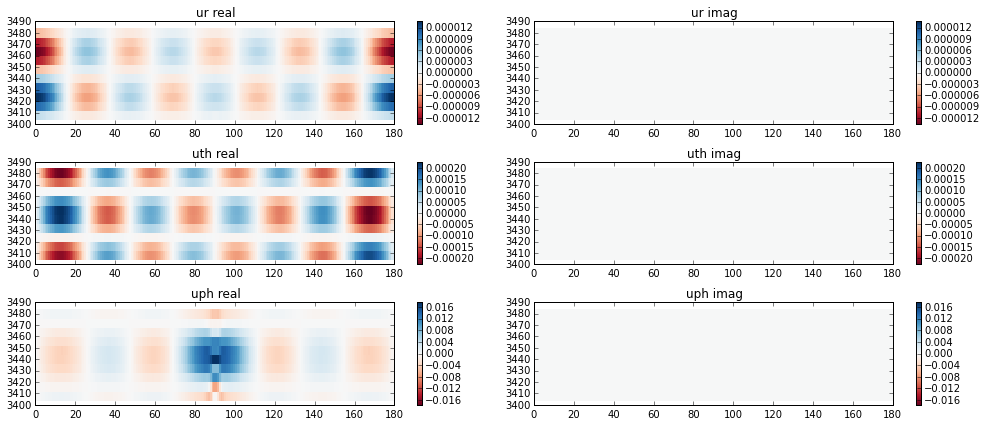

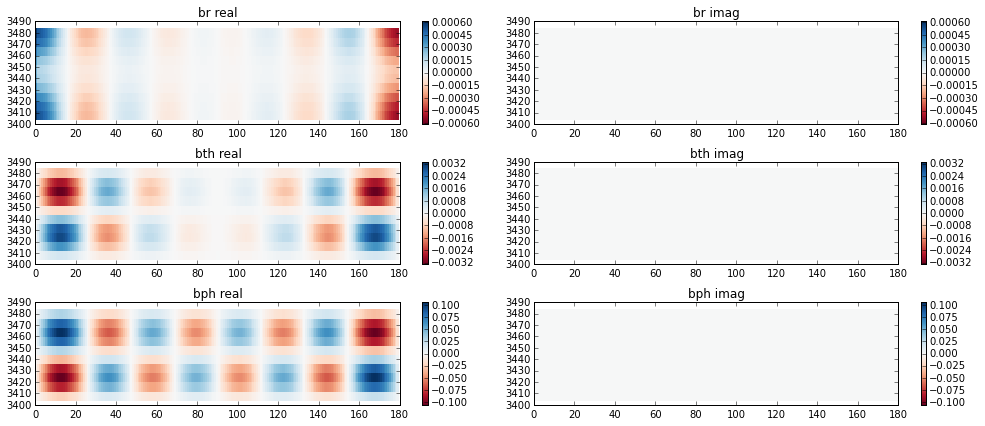

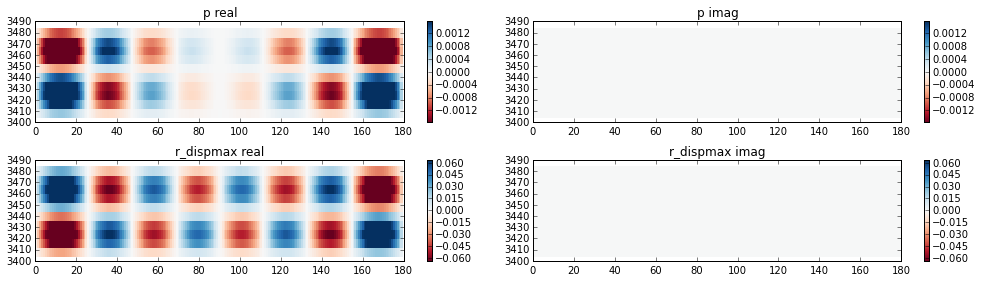

In [15]:
vectest1 = eigenvectors[0][7]+eigenvectors[0][8]

rpl = r[1:]*R
thpl = th[1:-1]*180./np.pi

fig = plt.figure(figsize=(14,6))
ur,urtop,urbottom = model.getVariable(vectest1,'ur')
uth,uthtop,uthbottom = model.getVariable(vectest1,'uth')
uph,uphtop,uphbottom = model.getVariable(vectest1,'uph')

urmax = np.amax(abs(ur))
plt.subplot(3,2,1)
plt.pcolor(thpl,rpl,ur.real, cmap='RdBu',vmin=-urmax, vmax=urmax)
plt.title('ur real')
plt.colorbar()
plt.subplot(3,2,2)
plt.pcolor(thpl,rpl,ur.imag, cmap='RdBu',vmin=-urmax, vmax=urmax)
plt.title('ur imag')
plt.colorbar()

uthmax = np.amax(abs(uth))
plt.subplot(3,2,3)
plt.pcolor(thpl,rpl,uth.real, cmap='RdBu',vmin=-uthmax, vmax=uthmax)
plt.title('uth real')
plt.colorbar()
plt.subplot(3,2,4)
plt.pcolor(thpl,rpl,uth.imag, cmap='RdBu',vmin=-uthmax, vmax=uthmax)
plt.title('uth imag')
plt.colorbar()

uphmax = np.amax(abs(uph))
plt.subplot(3,2,5)
plt.pcolor(thpl,rpl,uph.real, cmap='RdBu',vmin=-uphmax, vmax=uphmax)
plt.title('uph real')
plt.colorbar()
plt.subplot(3,2,6)
plt.pcolor(thpl,rpl,uph.imag, cmap='RdBu',vmin=-uphmax, vmax=uphmax)
plt.title('uph imag')
plt.colorbar()

fig.tight_layout()


fig = plt.figure(figsize=(14,6))
br,brtop,brbottom = model.getVariable(vectest1,'br')
bth,bthtop,bthbottom = model.getVariable(vectest1,'bth')
bph,bphtop,bphbottom = model.getVariable(vectest1,'bph')

brmax = np.amax(abs(br))
plt.subplot(3,2,1)
plt.pcolor(thpl,rpl,br.real, cmap='RdBu',vmin=-brmax, vmax=brmax)
plt.title('br real')
plt.colorbar()
plt.subplot(3,2,2)
plt.pcolor(thpl,rpl,br.imag, cmap='RdBu',vmin=-brmax, vmax=brmax)
plt.title('br imag')
plt.colorbar()

bthmax = np.amax(abs(bth))
plt.subplot(3,2,3)
plt.pcolor(thpl,rpl,bth.real, cmap='RdBu',vmin=-bthmax, vmax=bthmax)
plt.title('bth real')
plt.colorbar()
plt.subplot(3,2,4)
plt.pcolor(thpl,rpl,bth.imag, cmap='RdBu',vmin=-bthmax, vmax=bthmax)
plt.title('bth imag')
plt.colorbar()

bphmax = np.amax(abs(bph))
plt.subplot(3,2,5)
plt.pcolor(thpl,rpl,bph.real, cmap='RdBu',vmin=-bphmax, vmax=bphmax)
plt.title('bph real')
plt.colorbar()
plt.subplot(3,2,6)
plt.pcolor(thpl,rpl,bph.imag, cmap='RdBu',vmin=-bphmax, vmax=bphmax)
plt.title('bph imag')
plt.colorbar()
fig.tight_layout()


fig = plt.figure(figsize=(14,4))
p,ptop,pbottom = model.getVariable(vectest1,'p')
r_disp = model.getVariable(vectest1,'r_disp')

pmax = np.amax(abs(p))
plt.subplot(2,2,1)
plt.pcolor(thpl,rpl,bth.real, cmap='RdBu',vmin=-pmax, vmax=pmax)
plt.title('p real')
plt.colorbar()
plt.subplot(2,2,2)
plt.pcolor(thpl,rpl,bth.imag, cmap='RdBu',vmin=-pmax, vmax=pmax)
plt.title('p imag')
plt.colorbar()

r_dispmax = np.amax(abs(r_disp))
plt.subplot(2,2,3)
plt.pcolor(thpl,rpl,bph.real, cmap='RdBu',vmin=-r_dispmax, vmax=r_dispmax)
plt.title('r_dispmax real')
plt.colorbar()
plt.subplot(2,2,4)
plt.pcolor(thpl,rpl,bph.imag, cmap='RdBu',vmin=-r_dispmax, vmax=r_dispmax)
plt.title('r_dispmax imag')
plt.colorbar()
fig.tight_layout()



plotting


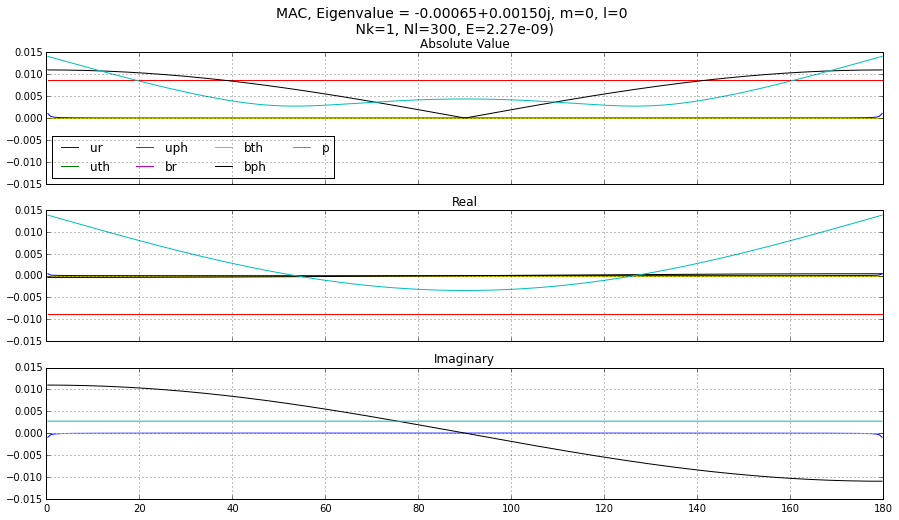

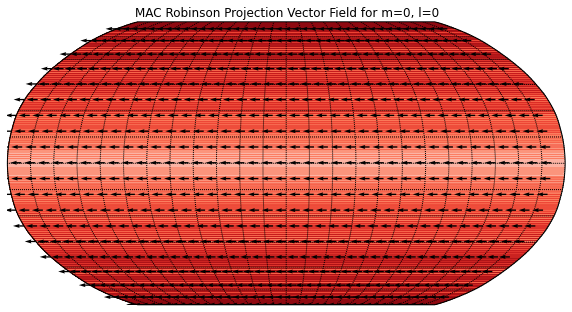

In [19]:
print '\nplotting'
reload(mplt)
to_plot = 0
# mplt.plot_1D(model,filtered_eigenvectors[to_plot],filtered_eigenvalues[to_plot],m,to_plot)
mplt.plot_1D(model,eigenvectors[m][to_plot],eigenvalues[m][to_plot],0,to_plot)
mplt.plot_robinson(model,eigenvectors[m][to_plot],eigenvalues[m][to_plot],0,to_plot)

# for m in m_values:
#     for ind in range(len(filtered_eigenvalues)):
#         mplt.plot_1D(model,filtered_eigenvectors[ind],filtered_eigenvalues[ind],m,ind)
# # plt.clf()

In [10]:
### Make starting vector for iteration ###
vec_0 = {}
for m in m_values:
    l=m
    ur_0 = np.ones((Nk,Nl))*1.e-5
    urBC_0 = np.ones((2,Nl))*1.e-5
    uth_0 = np.ones((Nk,1))*np.matrix(sp.special.sph_harm(m,l,0.*np.ones_like(th[1:-1]),th[1:-1]))
    uthBC_0 = np.ones((2,Nl))*1.e-5
    uph_0 = np.ones((Nk,1))*np.matrix(sp.special.sph_harm(m,l,0.*np.ones_like(th[1:-1]),th[1:-1]))
    uphBC_0 = np.ones((2,Nl))*1.e-5
    p_0 = np.ones((Nk,1))*np.matrix(sp.special.sph_harm(m,l,0.*np.ones_like(th[1:-1]),th[1:-1]))
    pBC_0 = np.ones((2,1))*np.matrix(sp.special.sph_harm(m,l,0.*np.ones_like(th[1:-1]),th[1:-1]))
    variables = [ur_0,uth_0,uph_0,ur_0,uth_0,uph_0,p_0]
    boundaries = [urBC_0,uthBC_0,uphBC_0,urBC_0,uthBC_0,uphBC_0,pBC_0]
    vec_0[m] = model.create_vector(variables,boundaries)


RuntimeError: Incorrect number of variable vectors passed